In [80]:
import pandas as pd
import numpy as np

In [81]:
df = pd.read_csv('./datas/anemia.csv')
df

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [83]:
df.shape

(1421, 6)

In [84]:
target = df['Result']
data = df.drop(columns='Result',axis=1)
data

,Gender,Hemoglobin,MCH,MCHC,MCV
0,1,14.9,22.7,29.1,83.7
1,0,15.9,25.4,28.3,72.0
2,0,9.0,21.5,29.6,71.2
3,0,14.9,16.0,31.4,87.5
4,1,14.7,22.0,28.2,99.5
...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9
1417,1,12.1,28.3,30.4,86.9
1418,1,13.1,17.7,28.1,80.7
1419,0,14.3,16.2,29.5,95.2


In [85]:
data.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786
std,0.499745,1.974546,3.969375,1.400898,9.636701
min,0.000000,6.600000,16.000000,27.800000,69.400000
25%,0.000000,11.700000,19.400000,29.000000,77.300000
50%,1.000000,13.200000,22.700000,30.400000,85.300000
75%,1.000000,15.000000,26.200000,31.400000,94.200000
max,1.000000,16.900000,30.000000,32.500000,101.600000


In [86]:
values =  df['Result'].value_counts()
values

Result
0    801
1    620
Name: count, dtype: int64

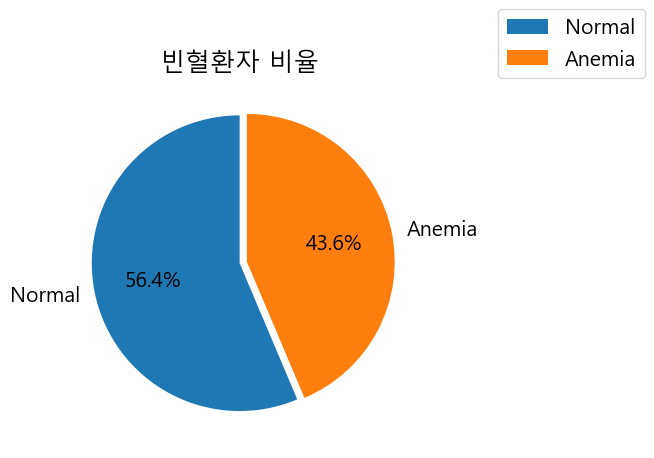

In [87]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False 
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # : windows 사용자용
matplotlib.rcParams['font.size'] = '15' 


labels = ['Normal', 'Anemia']
explode = [0,0.05] 

plt.pie(values, labels=labels, autopct ='%.1f%%', startangle = 90, explode=explode, counterclock=True)
plt.title('빈혈환자 비율')
plt.legend(loc=(1.2,1.0))
plt.show()

In [88]:
import matplotlib.pyplot as plt

corr = data.corr()
corr

,Gender,Hemoglobin,MCH,MCHC,MCV
Gender,1.000000,0.010972,0.001042,0.014574,-0.040447
Hemoglobin,0.010972,1.000000,0.014081,-0.042597,-0.025885
MCH,0.001042,0.014081,1.000000,0.018795,-0.015948
MCHC,0.014574,-0.042597,0.018795,1.000000,0.068450
MCV,-0.040447,-0.025885,-0.015948,0.068450,1.000000


<Axes: >

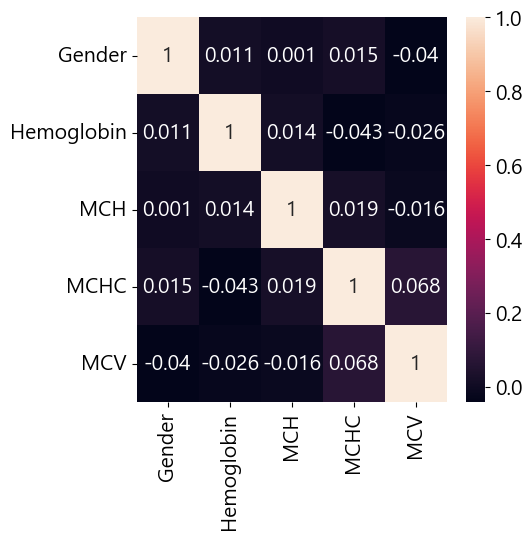

In [89]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns, yticklabels=corr.columns)

In [90]:
data.columns

Index(['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV'], dtype='object')

C:\Users\user\AppData\Local\Temp\ipykernel_16132\1319987539.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]])
C:\Users\user\AppData\Local\Temp\ipykernel_16132\1319987539.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]])
C:\Users\user\AppData\Local\Temp\i

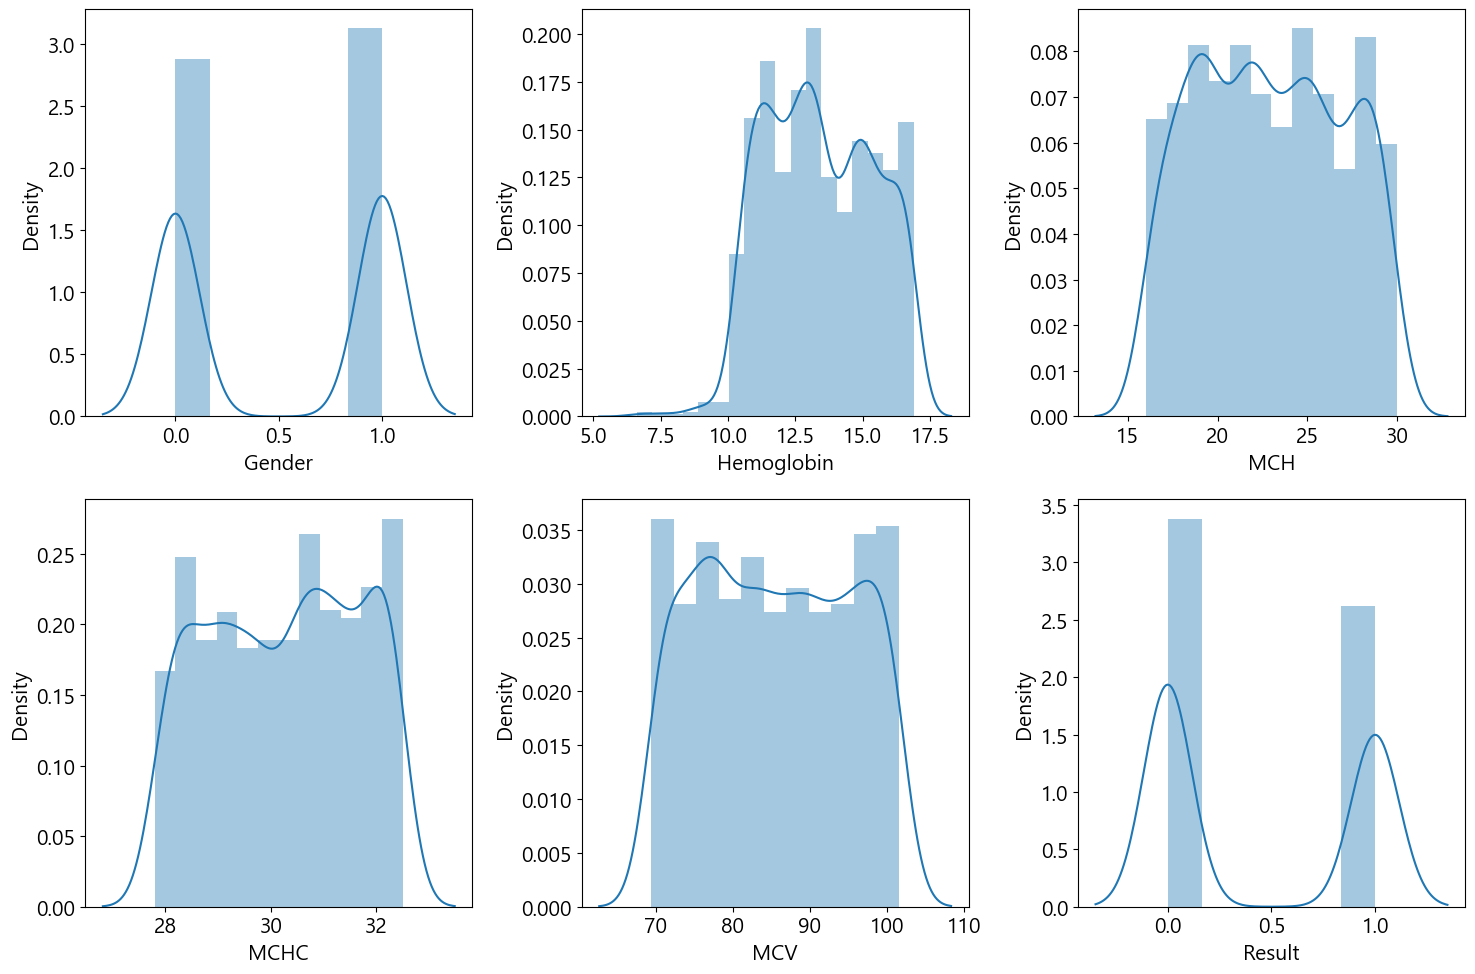

In [91]:
plt.figure(figsize=(15,10))
fig = plt.figure(1)
for i in range(len(df.columns)):
    ax = fig.add_subplot(2,3,i+1)
    sns.distplot(df[df.columns[i]])   
plt.tight_layout()
plt.show()

In [92]:
# 데이터 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target,random_state=42
)

In [93]:
# 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
train_scaled
test_scaled

array([[ 0.96402688, -0.34318322, -0.96426704, -0.32243844, -0.12301172],
       [-1.03731547,  0.71855322,  1.32358618,  0.39506457, -1.53225139],
       [ 0.96402688,  0.0612878 ,  1.19787996,  0.53856517, -0.84835566],
       ...,
       [ 0.96402688,  1.32525976, -0.7128546 ,  0.61031547,  1.0375386 ],
       [ 0.96402688, -1.15212527, -0.21002972, -0.60943964,  1.19296944],
       [-1.03731547, -0.14094771,  1.02189125,  1.54306938,  1.2758659 ]])

## Classification

### 로지스틱 회귀모델

In [94]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

LogisticRegression()

In [95]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9915492957746479
0.9915730337078652


### KNN 모델

In [96]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_scaled,train_target)

KNeighborsClassifier()

In [97]:
print(knn.score(train_scaled, train_target))
print(knn.score(test_scaled, test_target))

0.9849765258215962
0.9719101123595506


### 결정트리 모델

In [98]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)

DecisionTreeClassifier()

In [99]:
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

1.0
1.0


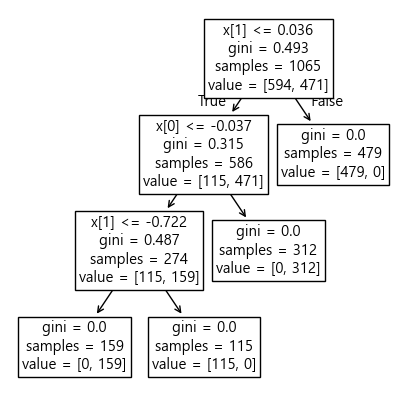

In [100]:
from sklearn.tree import plot_tree
plt.figure(figsize=(5,5))
plot_tree(dt)
plt.show()

## Prediction

### KNeighbor Regressor

In [101]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_scaled, train_target)
knr_pred = knr.predict(test_scaled)
train_score = knr.score(train_scaled, train_target)
test_score = knr.score(test_scaled, test_target)
print(train_score)
print(test_score)

0.9763142155215757
0.9551131717263417


### Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.701637609947211
0.7092111753487819


In [103]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [104]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9207632695247729
0.8930167296019049


In [105]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [106]:
# 릿지 규제
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.813649987606726
0.8049017318594239


In [107]:
train_score = []
test_score= []

alpha_list = [0.001,0.01,0.1,1,10,100,1000]

for alpha in alpha_list:
    ridge = Ridge(alpha =alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


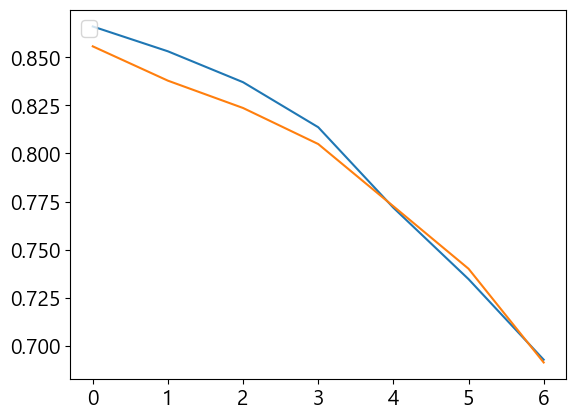

In [108]:
x = np.arange(0,7).reshape(-1,1)
plt.plot(x,train_score)
plt.plot(x,test_score)
plt.legend(loc='upper left')

In [109]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

param = {'num_leaves':30, 'objective':'binary', 'metric':'auc'}
train_data = lgb.Dataset(train_scaled, label= train_target.values)
num_round = 10
lgbm_p = lgb.train(param, train_data,  num_round)
lgbm_p_pred = lgbm_p.predict(test_scaled)
pred_test = pd.Series(lgbm_p_pred).apply(lambda x:1 if x>=0.5 else 0)
print("LightBoost 예측률 : ", accuracy_score(test_target, pred_test))

[LightGBM] [Info] Number of positive: 471, number of negative: 594
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006633 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45546
[LightGBM] [Info] Number of data points in the train set: 1065, number of used features: 251
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.442254 -> initscore=-0.232021
[LightGBM] [Info] Start training from score -0.232021
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def pred_report(y, pred):
    mae = mean_absolute_error(y, pred)
    mse = np.sqrt(mean_squared_error(y, pred))
    rmse = mse**0.5
    r2 = r2_score(y, pred)
    print( "MAE : ", mae)
    print( "MSE : ", mse)
    print( "RMSE : ", rmse)
    print( "R-squared : ", r2)

In [111]:
print("LightBoost의 평가지표 ( MAE , MSE , RMSE , R-squared): ")
pred_report(test_target, lgbm_p_pred)

LightBoost의 평가지표 ( MAE , MSE , RMSE , R-squared): 
MAE :  0.17766734236247725
MSE :  0.17895079523103855
RMSE :  0.42302576189995633
R-squared :  0.8684137084830519
